# Tarea 1 Métodos Lineales para regresión
---
## Integrantes: 
- *José Eduardo Caimapo* -  jose.caimapo.12@sansano.usm.cl - 201373573-8
- *Rodrigo Sepúlveda* - rodrigo.sepulveda.12@sansano.usm.cl - 201204766-8

# 1. Regresión lineal ordinaria
En la siguiente sección se centra en estudiar las regresiones lineales ordinarias, para esto se utilizará el conjunto de datos “House Sales in King County, USA”, presentado en la plataforma Kaggle, el cual se compone de 21613 registros de casas vendidas en el condado de King, incluyendo Seattle, entre mayo del 2014 y mayo del 2015, el conjunto de datos incluye información de las casas y su precio. El objetivo de estudiar este conjunto de datos es predecir el valor de una vivienda de acuerdo con sus características.

In [1]:
# Imports 
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import sklearn.linear_model as lm

from sklearn.metrics       import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## a) Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó
Se procede a construir un dataframe con los elementos del conjunto de datos, 	además se eliminan las columnas que no aportan información relevante al problema, entre estas el identificador de cada registro, la fecha en que vendió la casa,  el zipcode. Además, se muestran los primeros 5 registros del conjunto de datos. 

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id', 'date', 'zipcode',], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## b) Describa brevemente el dataset a utilizar
A continuación, se procede a describir la información del conjunto de datos:

In [3]:
df.shape

(21613, 18)

El conjunto de datos se compone de 21613 filas las cuales corresponden a los registros de la casas vendidas y 18 columnas las cuales corresponden a los distintos atributos o cualidades presentes en el conjunto de datos incluyéndose el precio de cada casa, siendo este la variable a predecir. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


De las columnas del conjunto de datos es posible apreciar que ninguna presenta valores faltantes, y cada columna corresponde a:

| Predictor   | Descripción                              |
|:---------   |:--------------------------------------   |
| price       | Precio de la casa, variable a predecir   |
| bedrooms    | Número de habitaciones por casa          |
| bathrooms   | Número de baños por cada habitación      |
| sqft_living | Pies cuadrados de la casa                |
| sqft_lot    | Pies cuadrados del terreno               |
| floors      | Cantidad de pisos en la casa             |
| waterfront  | Si la casa tiene vista a la costa        |
| view        | Si fue vista                                          |
| condition   | Qué tan buena es la condición de la casa (en general) |
| grade | Grado general dado a la unidad de vivienda, basado en el sistema de clasificación del condado de King |
| sqft_above | Metros cuadrados de la casa aparte del sótano |
| sqft_basement | Metros cuadrados del sótano |
| yr_built | Año de construcción | 
| yr_renovated | Año de renovación de la casa |
| lat | Coordenada de Latitud |
| long | Coordenada de Longitud |
| sqft_living15 | Área de la sala de estar en el 2015 |
| sqft_lot15 | Área del lotSize en el 2015 |

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


De los estadísticos presentados para cada columna, es posible apreciar que todas las columnas poseen un valor diferente, y en distintas magnitudes, para el promedio y la desviación estándar. Además, se observa que cada columna presenta su propia escala, produciendo grandes diferencias entre los distintos atributos. Finalmente es posible apreciar que los atributos que no aplican para cada columna se representan con un cero, es decir si una casa no se ha remodelado el valor para el año de remodelación es 0, y así para cada atributo que no aplique en cada registro. 

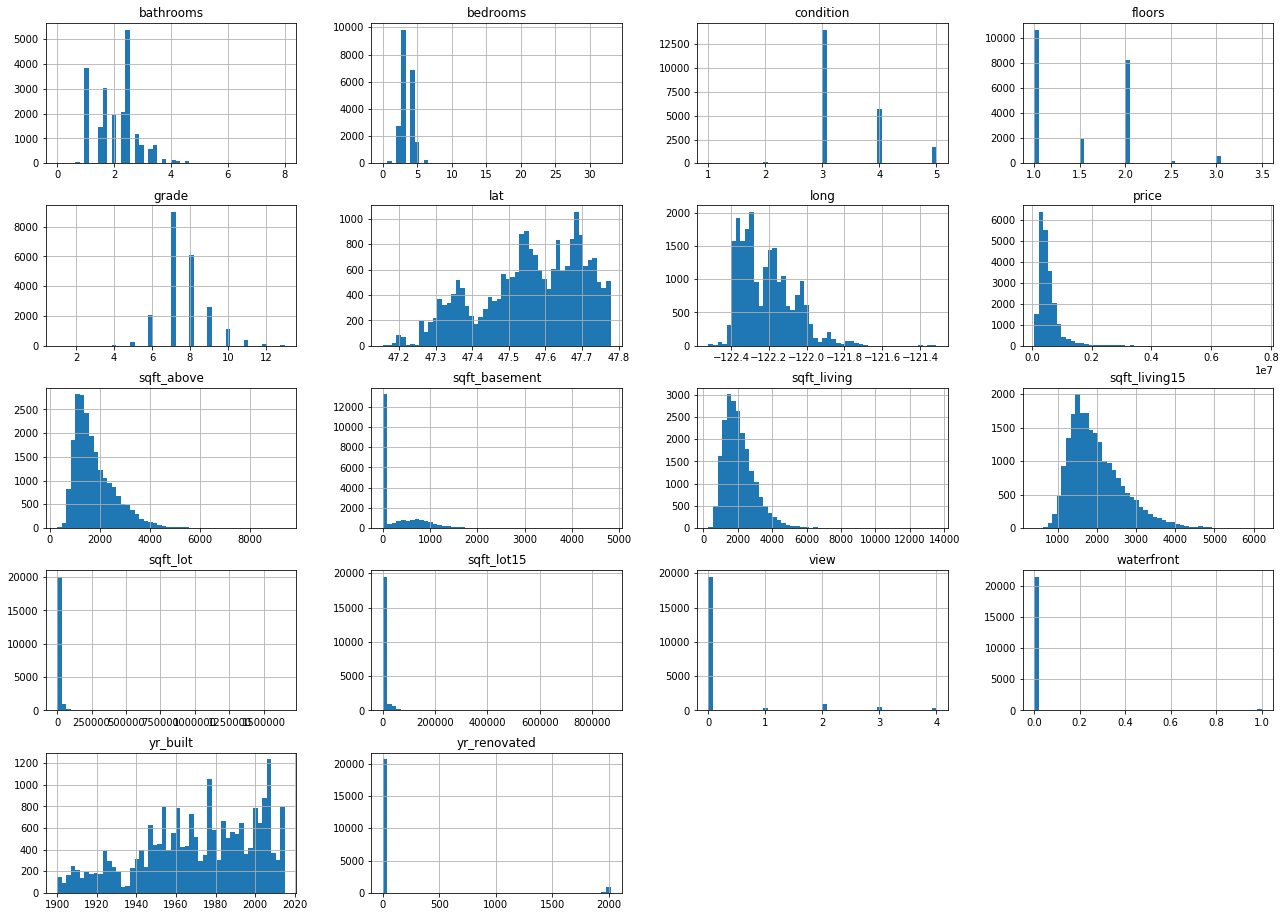

In [6]:
df.hist(bins=50, figsize=(22,16))
plt.show()

## c) Normalice los datos antes de trabajar y aplique una trasformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.

Antes de determinar la regresión lineal ordinaria es necesario normalizar los datos, es decir hacer que las características de los datos tengan media cero y varianza unitaria. 

El normalizar o estandarización de los datos es requerimiento común en muchos métodos de aprendizaje automático, en especial de una LSS donde los supuestos consisten en que las características de los datos poseen media cero y varianza unitaria. Si se entrena una LSS con un conjunto de datos no estandarizado/normalizado es de esperar que el resultado obtenido sea malo.  Además, los regularizadores, como el l1 y l2, azumen que las características están centradas en el cero y que las varianzas están en la misma magnitud, si las características poseen varianzas en distintas magnitudes, las de mayor magnitud predominaran en la función objetivo haciendo que el modelo no sea capaz de aprender otras características como se esperaría. 


Finalmente se aplica una trasformación a la variable estudiada para que esta posea un comportamiento lineal y así poder ser estimada correctamente por el modelo a generar.

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,13.047817,2.367051e-16,-1.788439e-16,2.419652e-16,1.052023e-17,-3.156068e-17,-5.260114e-18,-1.052023e-17,-2.577456e-16,2.524855e-16,1.104624e-16,6.838148e-17,1.914681e-15,1.315028e-18,-3.446262e-14,-3.636843e-14,8.153176e-17,-2.893063e-17
std,0.526685,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,11.225243,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,12.682152,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,13.017003,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,13.377006,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,15.856731,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


Después de normalizar el conjunto de datos, se aprecia que las medias de las características son casi iguales a cero, y las varianzas son casi iguales a uno.

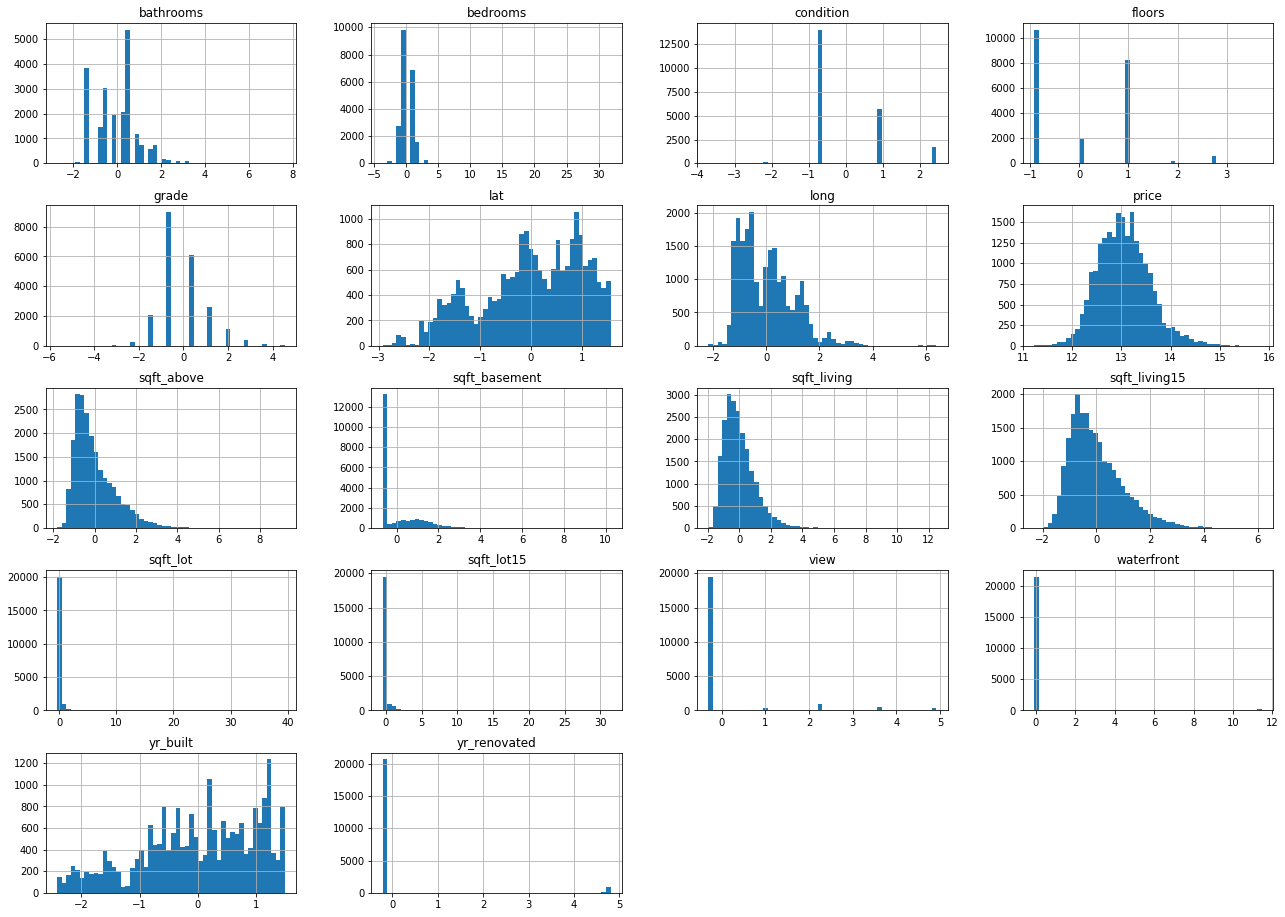

In [9]:
df_scaled.hist(bins=50, figsize=(22,16))
plt.show()

In [9]:
def set_style(axarr, lx, ly, title):
    axarr.set_xlabel(lx)
    axarr.set_ylabel(ly)
    axarr.set_title(title)
    axarr.grid(True)

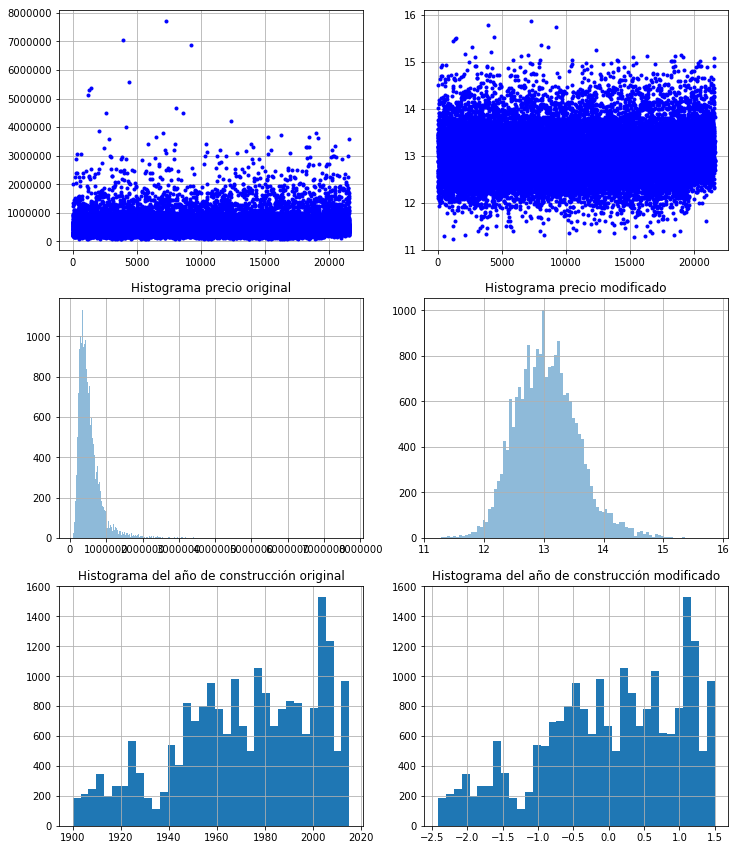

In [10]:
f, axarr = plt.subplots(3, 2,figsize=(12,15))

axarr[0, 0].plot(df['price'], 'b.')
set_style(axarr[0,0], '', '', '')

axarr[0, 1].plot(df_scaled['price'], 'b.')
set_style(axarr[0,1], '', '', '')

axarr[1, 0].hist(df['price'], bins='auto', alpha=0.5)
set_style(axarr[1,0], '', '', 'Histograma precio original')

axarr[1, 1].hist(df_scaled['price'], bins='auto', alpha=0.5)
set_style(axarr[1,1], '', '', 'Histograma precio modificado')

axarr[2, 0].hist(df['yr_built'], bins='auto')
set_style(axarr[2,0], '', '', u'Histograma del año de construcción original')

axarr[2, 1].hist(df_scaled['yr_built'], bins='auto')
set_style(axarr[2,1], '', '', u'Histograma del año de construcción modificado')

plt.show()

De los gráficos del precio antes y después de realizar la normalización se aprecia que la escala del precio se modifica drásticamente a una de menor amplitud donde la distribución de registros presenta una mayor homogeneidad, es decir no se aprecian grandes distancias entre los distintos valores. De los histogramas del año de construcción se aprecia que la normalización de los datos no afecto la distribución original de estos, solo modifico la media y la varianza.

## d) Realice una regresiónlineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la funcion que implementa la regresión lineal.
Primero se separa el conjunto de datos en la matriz $X$ y el vector de precios $y$

In [10]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']

El modelo que se desea construir posee la siguiente forma:
$$\hat{y} = \hat\beta \cdot X + \beta_0$$
Lo cual implica determinar el valor de $\hat\beta$ y $\hat\beta_0$, pero este modelo se puede simplificar combinando los valores de $\hat\beta$ y $\hat\beta_0$, resultando el siguiente modelo:
$$\hat{y} = \hat\beta \cdot X$$
Donde la matriz $X$ pose dimensiones $n \times d+1$, y los valores añadidos en $X$ son iguales a 1 debido a la identidad. Este nuevo modelo pose un entrenamiento de menor complejidad en comparación al primer modelo ya que solo es necesario determinar el valor de $\hat\beta$, 

Después se crean los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$) a partir de los conjuntos originales, para realizar dicha separación se asignaron los primeros 15129 elementos al conjunto de entrenamiento y los restantes al conjunto de pruebas.

In [11]:
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

Finalmente se crea el modelo de la LSS y se entrena.

In [12]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Finalmente se evalúa el modelo realizado obteniéndose una precisión igual a 93%

In [13]:
ypred = linreg.predict(Xtest)
print("Mean squared error: %.2f" % mean_squared_error(ytest,ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))


Mean squared error: 0.07
Variance score: 0.76


## e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor. ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?
Se procede a determinar el z-score para cada predictor, utilizando la siguiente formula:
$$Z_j = \frac{\hat\beta}{\hat\sigma \sqrt{v_j}} $$
Donde $\hat\beta_j$ es el elemento $j$ de los pesos determinados por la regresión, $v_j$ es el elemento  $j$ de la diagonal de $(X^TX)^{-1}$, y $\hat\sigma$ es la varianza calculada con la siguiente formula:
$$ \hat\sigma^2 = \frac{ \sum\limits^N_{i=1} \left( y_i - \hat y_i \right)^2 } {N} $$

In [14]:
Xm = Xtrain.as_matrix()
vj = np.diag(np.linalg.inv(Xm.T.dot(Xm)))
beta_est = linreg.coef_
sigma_est = np.sqrt(np.mean( (ypred - ytest)**2))

SEM = (sigma_est*np.sqrt(vj))
Zscore = beta_est/SEM

data = {
    'Beta'      : pd.Series(beta_est, index = X.columns.values),
    'std error' : pd.Series(SEM,      index = X.columns.values),
    'Z-Score'   : pd.Series(Zscore,   index = X.columns.values)
}

pd.DataFrame(data)

,Beta,Z-Score,std error
bedrooms,-8.507794e-03,-3.104705e+00,0.002740
bathrooms,5.558371e-02,1.447983e+01,0.003839
sqft_living,6.023069e+11,8.115732e+06,74214.732064
sqft_lot,2.230514e-02,7.606607e+00,0.002932
floors,3.726414e-02,1.209712e+01,0.003080
waterfront,3.355976e-02,1.472142e+01,0.002280
view,4.217377e-02,1.733540e+01,0.002433
condition,4.533592e-02,2.045388e+01,0.002216
grade,1.861727e-01,4.780141e+01,0.003895
sqft_above,-5.430561e+11,-8.115732e+06,66913.995477


Al observar los resultados del Z-score obtenidos se aprecia la existencia de valores NaN (Not a Number) los cuales son provocados por la presencia de valores negativos en la diagonal de la matriz $(X^TX)^{-1}$. 

*Explicación de por qué esto pasa*

## f) Propornga un método para corregir lo observado. Verifíquelo mediante los Z-score presentados en la pregunta anterior.

Para corregir lo obtenido se propone la identificación de los vectores dependientes, dejando de lado estos del dataset

In [15]:
X_filtro = X.drop(['sqft_living'], axis=1, inplace=False)
#y = df_scaled['price']
Xtrain2 = X_filtro[istrain]
#ytrain2 = y[istrain]
Xtest2 = X_filtro[np.logical_not(istrain)]
#ytest2 = y[np.logical_not(istrain)]

In [16]:
linreg2 = lm.LinearRegression(fit_intercept = False)
linreg2.fit(Xtrain2, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [17]:
Xm2 = Xtrain2.as_matrix()
vj2 = np.diag(np.linalg.inv(Xm2.T.dot(Xm2)))
beta_est2 = linreg2.coef_
ypred2 = linreg2.predict(Xtest2)
sigma_est2 = np.sqrt(np.mean( (ypred2 - ytest)**2))

SEM2 = (sigma_est2*np.sqrt(vj2))
Zscore2 = beta_est2/SEM2

data = {
    'Beta'      : pd.Series(beta_est2, index = X_filtro.columns.values),
    'std error' : pd.Series(SEM2,      index = X_filtro.columns.values),
    'Z-Score'   : pd.Series(Zscore2,   index = X_filtro.columns.values)
}

pd.DataFrame(data)

,Beta,Z-Score,std error
bedrooms,-0.008270,-3.018656,0.002740
bathrooms,0.055960,14.581522,0.003838
sqft_lot,0.022159,7.558868,0.002932
floors,0.037595,12.207513,0.003080
waterfront,0.033526,14.710529,0.002279
view,0.042082,17.302296,0.002432
condition,0.045277,20.432416,0.002216
grade,0.186212,47.823832,0.003894
sqft_above,0.099216,20.978081,0.004730
sqft_basement,0.059536,20.561632,0.002896


## g) Estime el error de predicción usando validación cruzada con un número de *folds* igual a $K=5$ y $K=10$

Para corregir lo obtenido se propone la identificación de los vectores dependientes, dejando de lado estos del dataset

In [186]:
X_filtro = X.drop(['sqft_living'], axis=1, inplace=False)
y = df_scaled['price']
Xtrain2 = X_filtro[istrain]
ytrain2 = y[istrain]
Xtest2 = X_filtro[np.logical_not(istrain)]
ytest2 = y[np.logical_not(istrain)]

linreg2 = lm.LinearRegression(fit_intercept = False)
linreg2.fit(Xtrain2, ytrain2)

vj2 = np.diag(np.linalg.inv(np.transpose(Xtrain2).dot(Xtrain2)))
beta_est2 = linreg2.coef_
ypred2 = linreg2.predict(Xtest2)
sigma_est2 = np.sqrt(np.mean( (ypred2 - ytest2)**2))
#Zscore2 = beta_est2/(sigma_est2*np.sqrt(vj2))
SEM2 = np.asarray(Xtrain2.std()) / np.sqrt(len(Xtrain2))
Zscore2 = beta_est2/SEM2
for w,x,y,z in zip(list(X),beta_est,SEM,Zscore):
    print(w +",\t Peso: "+str(x)+",\t\t std error"+str(y)+",\t\t Zscore: "+str(z))

bedrooms,	 Peso: -0.00850779438,		 std error0.00794910895648,		 Zscore: -1.0702827734
bathrooms,	 Peso: 0.0555837081756,		 std error0.00800706782498,		 Zscore: 6.94183056651
sqft_living,	 Peso: 602306892279.0,		 std error0.00801866705992,		 Zscore: 7.51130939566e+13
sqft_lot,	 Peso: 0.0223051374183,		 std error0.00839197387405,		 Zscore: 2.65791311473
floors,	 Peso: 0.0372641445973,		 std error0.007678468412,		 Zscore: 4.85306998712
waterfront,	 Peso: 0.0335597648151,		 std error0.00809138700692,		 Zscore: 4.1475911097
view,	 Peso: 0.0421737710021,		 std error0.00822937399318,		 Zscore: 5.12478483017
condition,	 Peso: 0.0453359204458,		 std error0.00832478041268,		 Zscore: 5.44589985541
grade,	 Peso: 0.186172711371,		 std error0.00805896440019,		 Zscore: 23.1013194904
sqft_above,	 Peso: -543056069125.0,		 std error0.00791827370687,		 Zscore: -6.85826341989e+13
sqft_basement,	 Peso: -290237509471.0,		 std error0.00827032329864,		 Zscore: -3.50938529233e+13
yr_built,	 Peso: -0.1096449052

c:\python27\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


## (h) Mida los errores de prediccion para cada dato de entrenamiento. Utilizando un \quantile-quantile plot" determine si es razonable la hipotesis de normalidad sobre los residuos del modelo.

### **2. Selección de Atributos **

Forward Step-wise Selection

In [19]:
def fss(x, y, names_x, k = 10000):
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
	remaining = range(0, p)
	selected = [p]
	current_score = best_new_score = 0.0
	while remaining and len(selected)<=k :
		score_candidates = []
		for candidate in remaining:
			model = lm.LinearRegression(fit_intercept=False)
			indexes = selected + [candidate]
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
			mse_candidate = np.mean(np.power(residuals_train, 2))
			score_candidates.append((mse_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
		best_new_score, best_candidate = score_candidates.pop()
		remaining.remove(best_candidate)
		selected.append(best_candidate)
		print "selected = %s ..."%names_x[best_candidate]
		print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
	return selected

In [20]:
names_regressors = X.columns[:-1] #without intercept
Xm = Xtrain2.as_matrix()
ym = ytrain2.as_matrix()
seleccionados = fss(Xm,ym,names_regressors)

NameError: name 'ytrain2' is not defined

## 3. Regularización

(a) Ajuste un modelo lineal utilizando Ridge Regression, es decir, regularizando con la norma $l2$.
La linea $ X2 = X.drop('intercept', axis=1,inplace=False)$ es critica dado a que en el modelo ya se ajusta el intercepto.

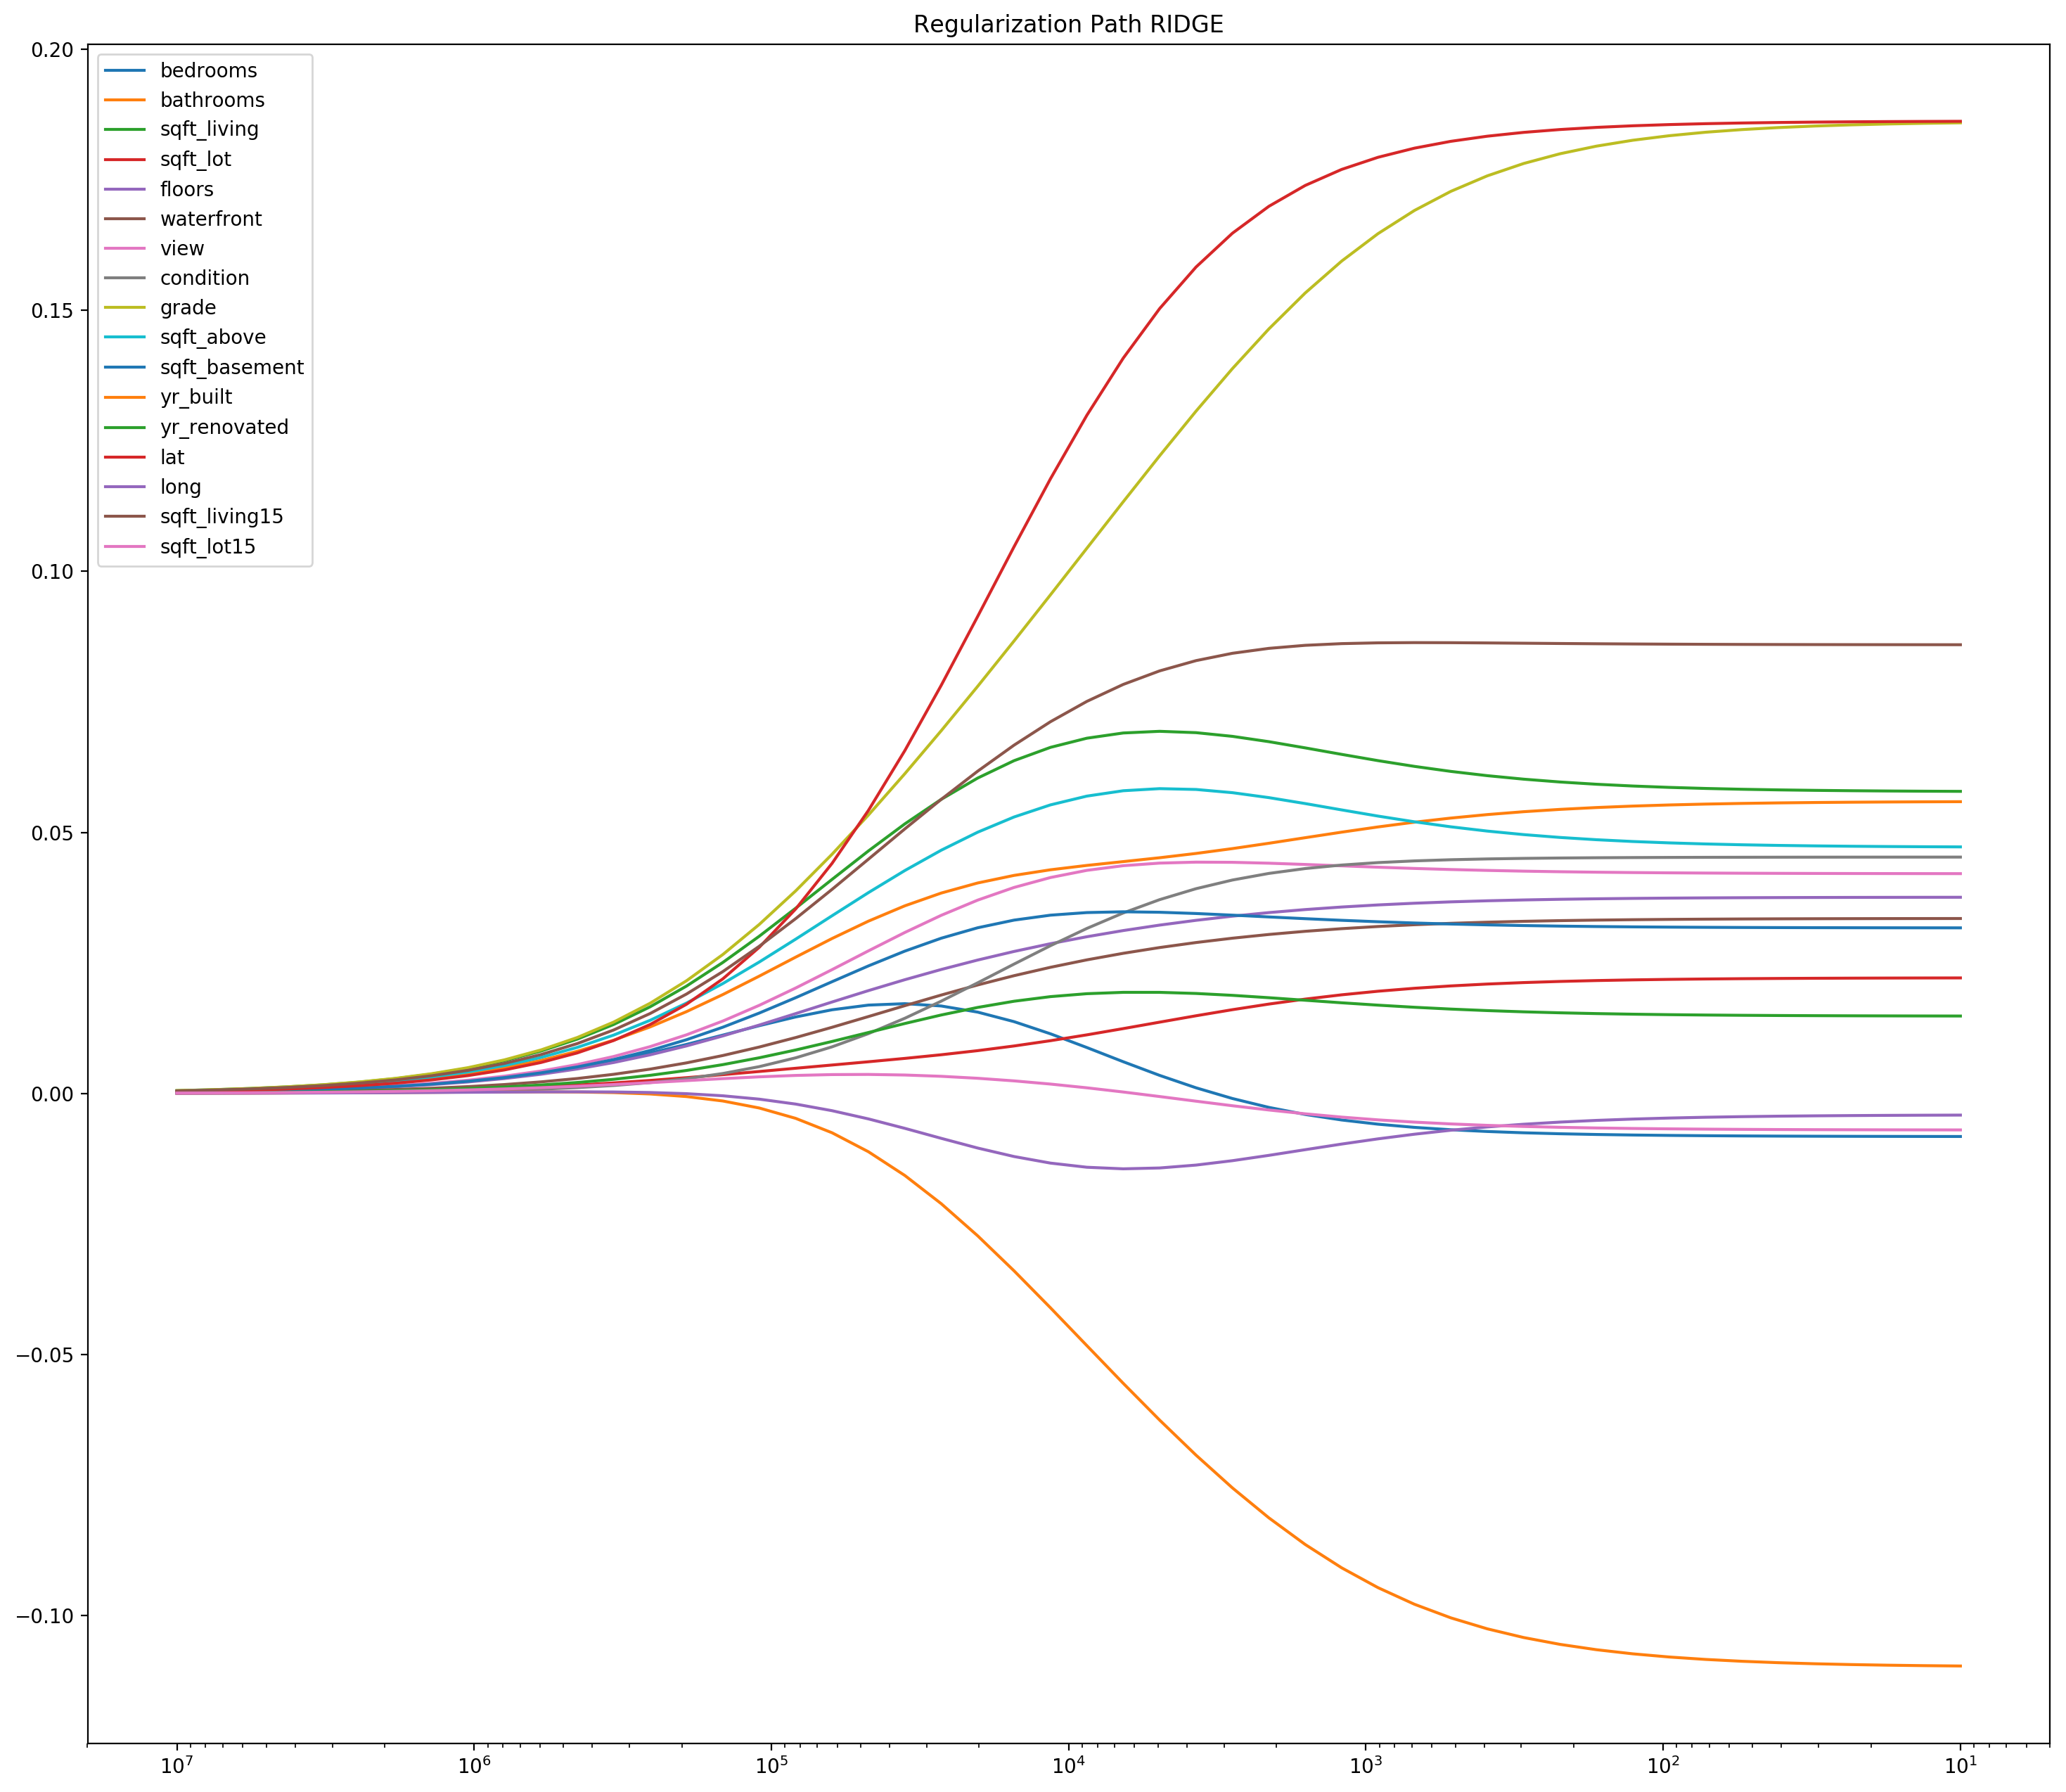

In [31]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
y = df_scaled['price']
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize = (18, 16),dpi= 200)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Para valores de $\lambda$ entre $10^{6}$ a $10^{5}$ la penalidad empieza a notarse, para ya a un final dejando claro los atributos sqft_lot , grade como principales debido al gran valor que tiene que tomar la penalidad para que estas dejen de ser significativas. En especial el atributo view se puede notar como aun siendo irrelevante no puede ser descartado asi como facilmente.

(b) Ajuste un modelo lineal utilizando el metodo Lasso, es decir, regularizando con la norma $l1$.

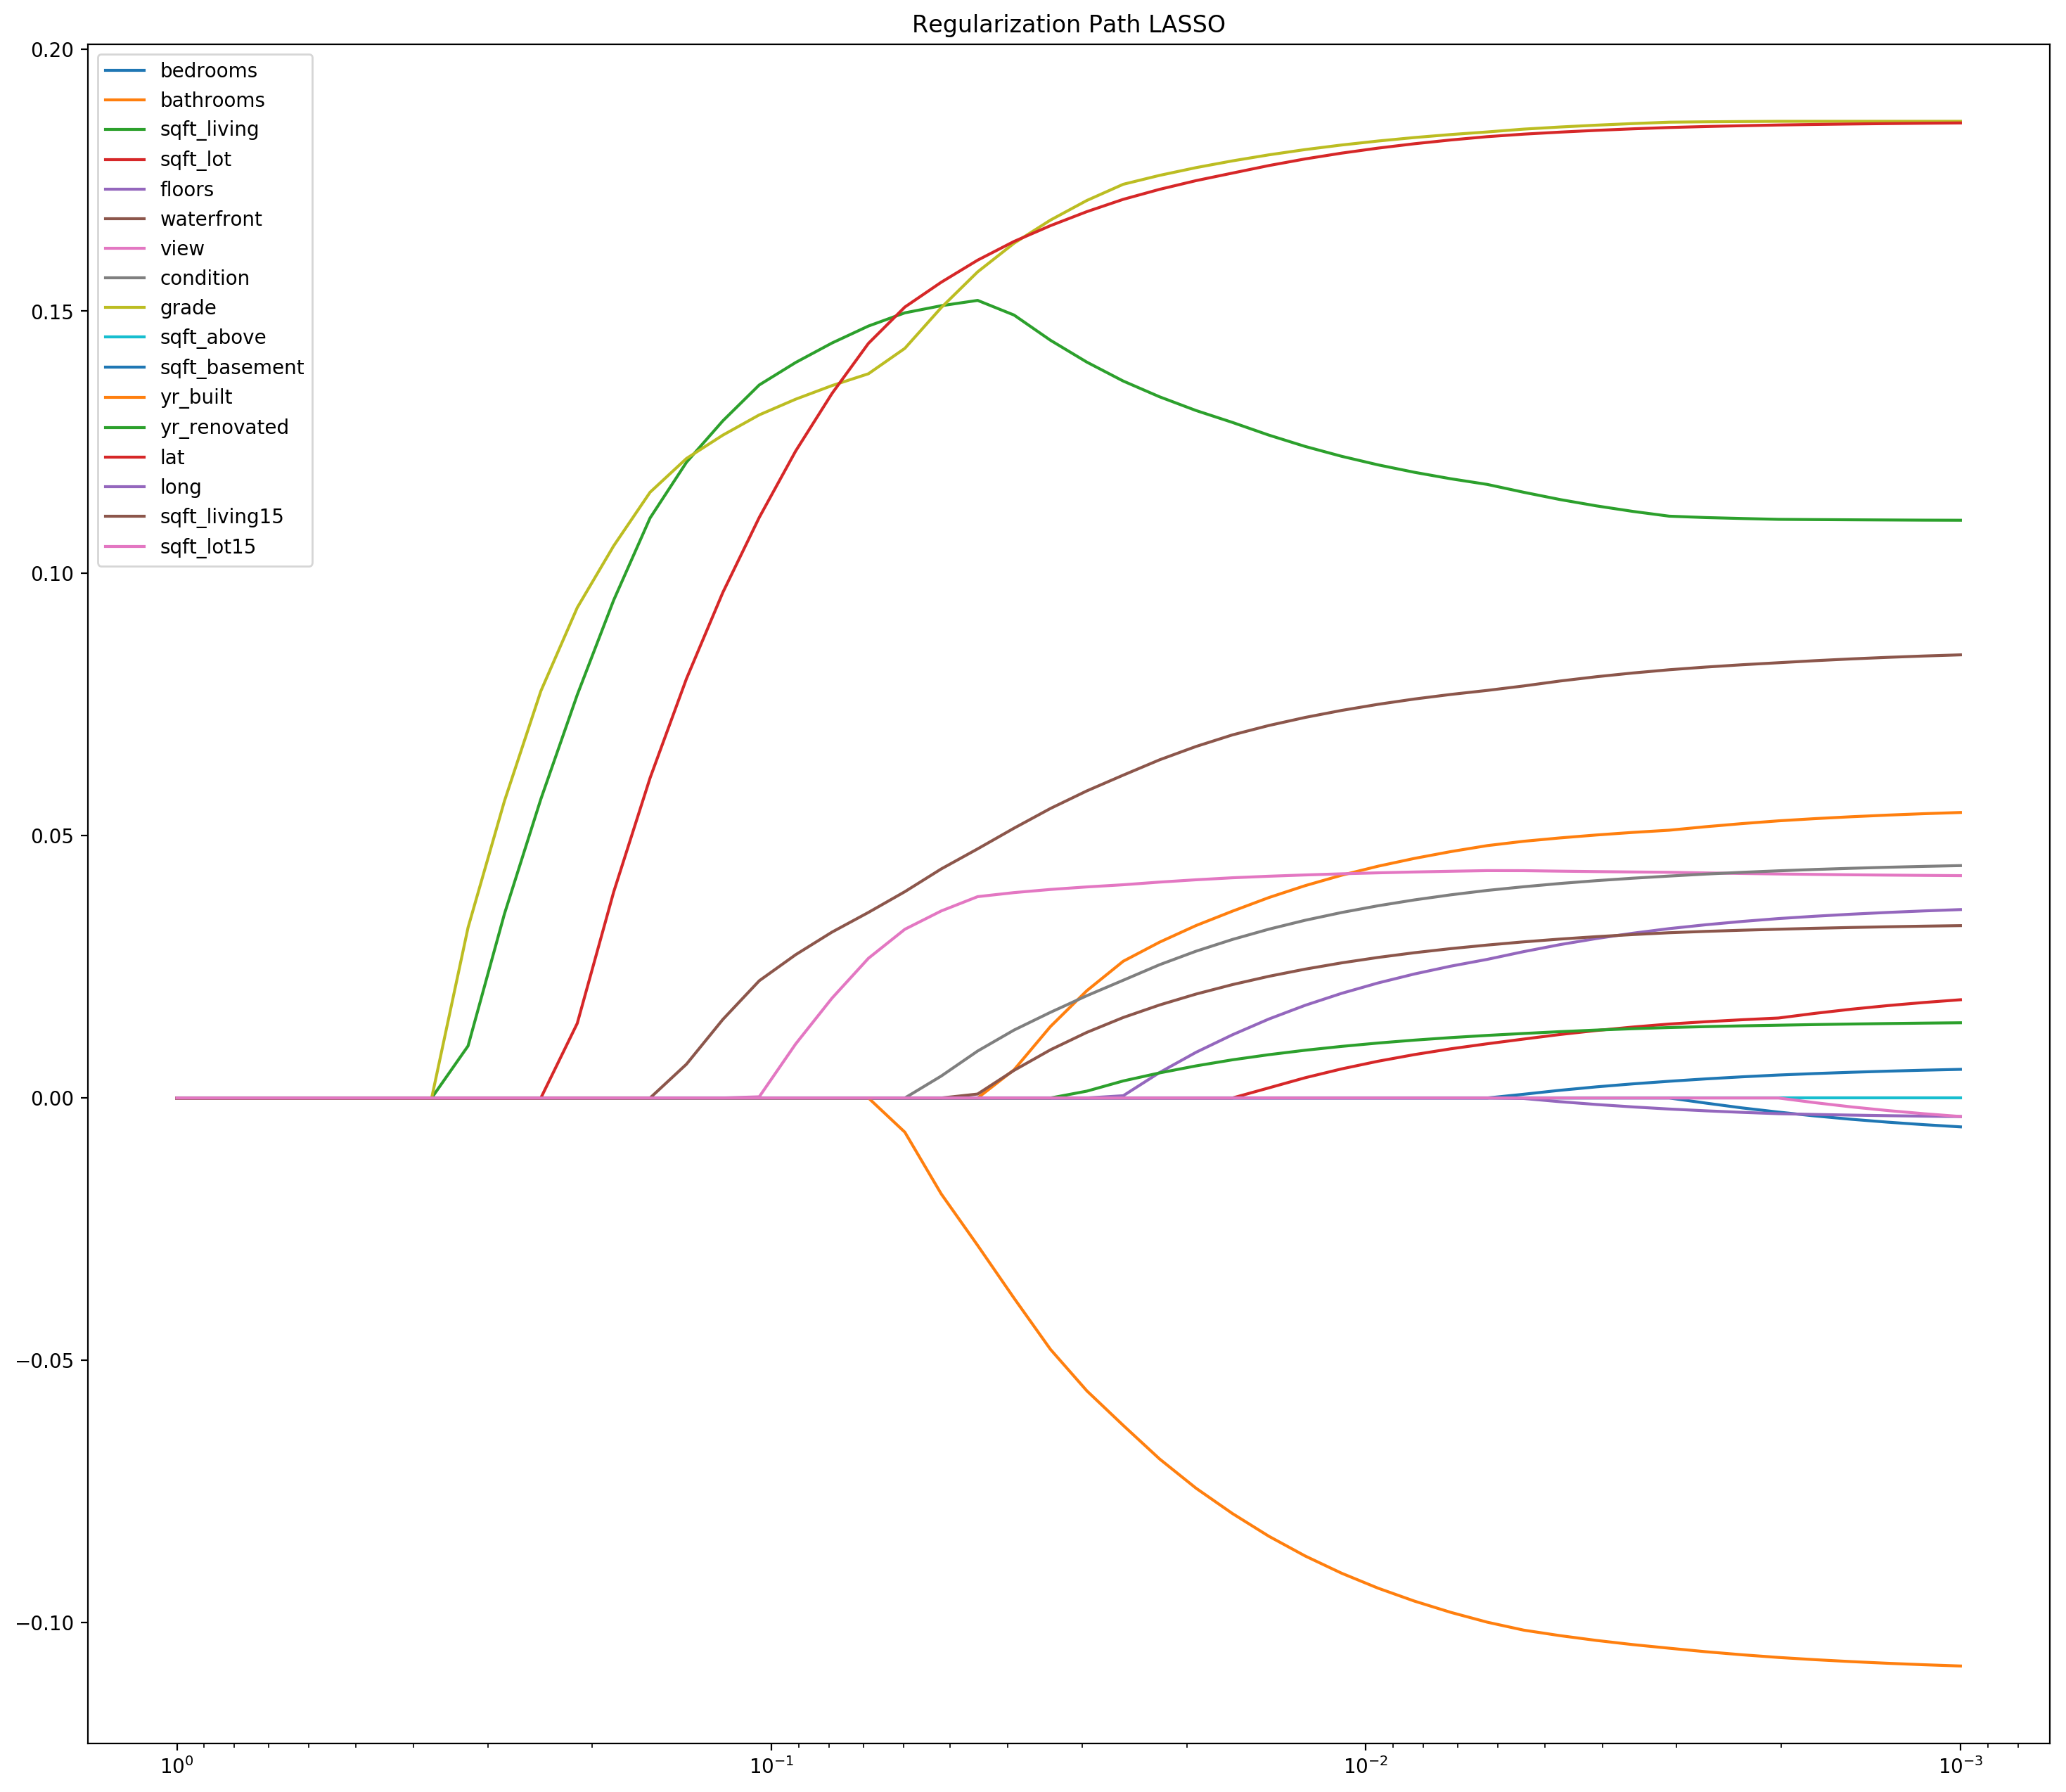

In [30]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
y = df_scaled['price']
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize = (18, 16),dpi= 200)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

En este caso la penalidad al ser regularizado por la norma l1 directamente anula ciertos atributos como sqft_above en todos los $\lambda$ usados. y con un $\lambda$ de $10^{-2}$ ya muchos de los atributos que ridge paulatinamente penalizaba aqui con lasso son bruscamente penalizados.

c) Escogiendo uno de los dos metodos regularizadores anteriores, especificando el porque, construya un
grafico que muestre el error de entrenamiento y el error de pruebas como funcion del parametro de
regularizacion.

Dado a que la regularización mediante Lasso es más fuerte, se decide a probar esta para mostrar los errores de entrenamiento y error de prueba.

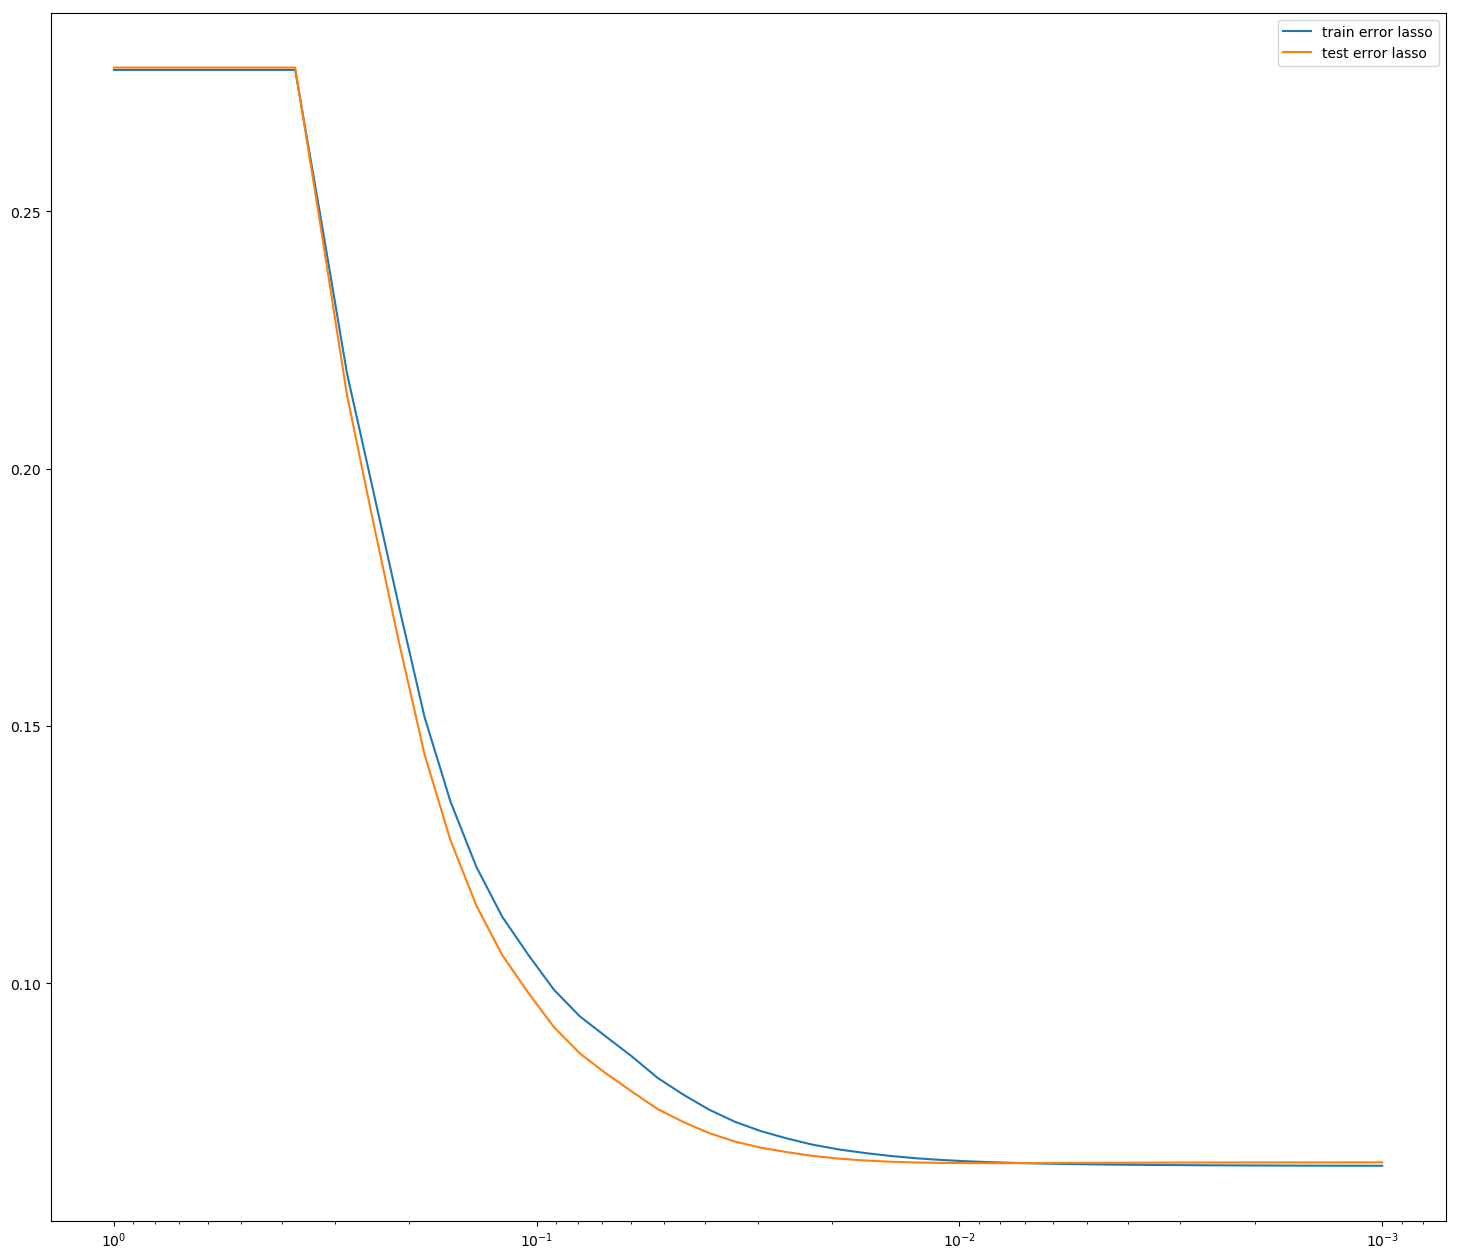

In [28]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
plt.figure(figsize=(18, 16),dpi= 100)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Mediante la figura se puede notar los con $\lambda$ pequeños entre 10^-3 y 10^-2 se tiene los errores muy similares pero el de error de prueba por encima del error de entrenamiento, después de 10^-2 se tiene el caso contrario y estos empiezan a separarse debido a la regularización que ocurre, hasta que convergen en un punto entre los lambdas de 10^-1 y 1 debido a que en este punto ya se penalizaron todos los pesos dejando todos en 0 (o cercanos a él).

#### d)Estime el valor del parametro de regularizacion en alguno de los modelos anteriores haciendo uso de la tecnica validacion cruzada.

In [33]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)#choose it
alphas_ = np.logspace(0,-3,base=10)#alphas to evaluate
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0

Al iterar con varios valores de $\lambda$ para cada metodo y obteniendo el mejor valor de mse realizando CrossValidation con 10 folds se puede observar que ambos metodos utilizando diferentes orden de magnitud de $\lambda$, dejando como mejor valor de 0.001 con un MSE de 0.064697

## 4. Drift

## 5. Detectar enfermedades cardíacas